# Plot spectral peaks found for a geophone station and the array detection counts for a day in a specific frequency range

In [1]:
# Imports
from os.path import join
from pandas import read_csv, to_datetime

from utils_basic import SPECTROGRAM_DIR as indir, GEO_STATIONS as stations, STARTTIME_GEO as starttime, ENDTIME_GEO as endtime
from utils_basic import get_day_begin_and_end
from utils_spec import assemble_spec_filename, string_to_time_label, read_geo_spectrograms, read_spectral_peaks, read_spectral_peak_bin_counts
from utils_plot import plot_geo_total_psd_peaks_and_array_counts, save_figure

In [2]:
# Inputs
# Data
station_to_plot = "B20"
min_freq = 0.0
max_freq = 200.0
window_length = 60.0
overlap = 0.0
downsample = True
downsample_factor = 60

# Finding peaks
rbw_threshold = 0.2
prom_threshold = 5

# Grouping
time_bin_width = "1min"
freq_bin_width = 1.0 # in Hz

# Plotting
marker_size = 3
size_scale = 20

major_time_spacing = 24
minor_time_spacing = 6

major_freq_spacing = 50
minor_freq_spacing = 10

dbmin = -30
dbmax = 10

rbwmin = rbw_threshold
rbwmax = 0.5

min_count = 0
max_count = len(stations)


In [3]:
# Read the spectrograms of the example station
filename = assemble_spec_filename("whole_deployment", "daily", "geo", station_to_plot, window_length, overlap, downsample, downsample_factor = downsample_factor)
inpath = join(indir, filename)

stream = read_geo_spectrograms(inpath)

In [4]:
# Compute the total PSD and stich the spectrograms together
stream.stitch()
stream.trim_freq(freqmin = min_freq, freqmax = max_freq)
trace_total = stream.get_total_power()

In [5]:
# Read all spectral peaks and find the peaks for the example station
if downsample:
    filename_peak = f"geo_spectral_peaks_window{window_length:.0f}s_overlap{overlap:.1f}_downsample{downsample_factor:d}_prom{prom_threshold:.0f}db_rbw{rbw_threshold}.csv"
else:
    filename_peak = f"geo_spectral_peaks_window{window_length:.0f}s_overlap{overlap:.1f}_prom{prom_threshold:.0f}db_rbw{rbw_threshold}.csv"
    
inpath = join(indir, filename_peak)

peak_df = read_spectral_peaks(inpath)
peak_df_to_plot = peak_df.loc[peak_df["station"] == station_to_plot]

peak_df_to_plot = peak_df_to_plot.loc[(peak_df["frequency"] > min_freq) & (peak_df["frequency"] < max_freq)]

In [6]:
# Read the spectral-peak bin counts
filename_count = filename_peak.replace("peaks", "peak_bin_counts")
inpath = join(indir, filename_count)

count_df =  read_spectral_peak_bin_counts(inpath)
count_df_to_plot = count_df.loc[(count_df["frequency"] > min_freq) & (count_df["frequency"] < max_freq)]

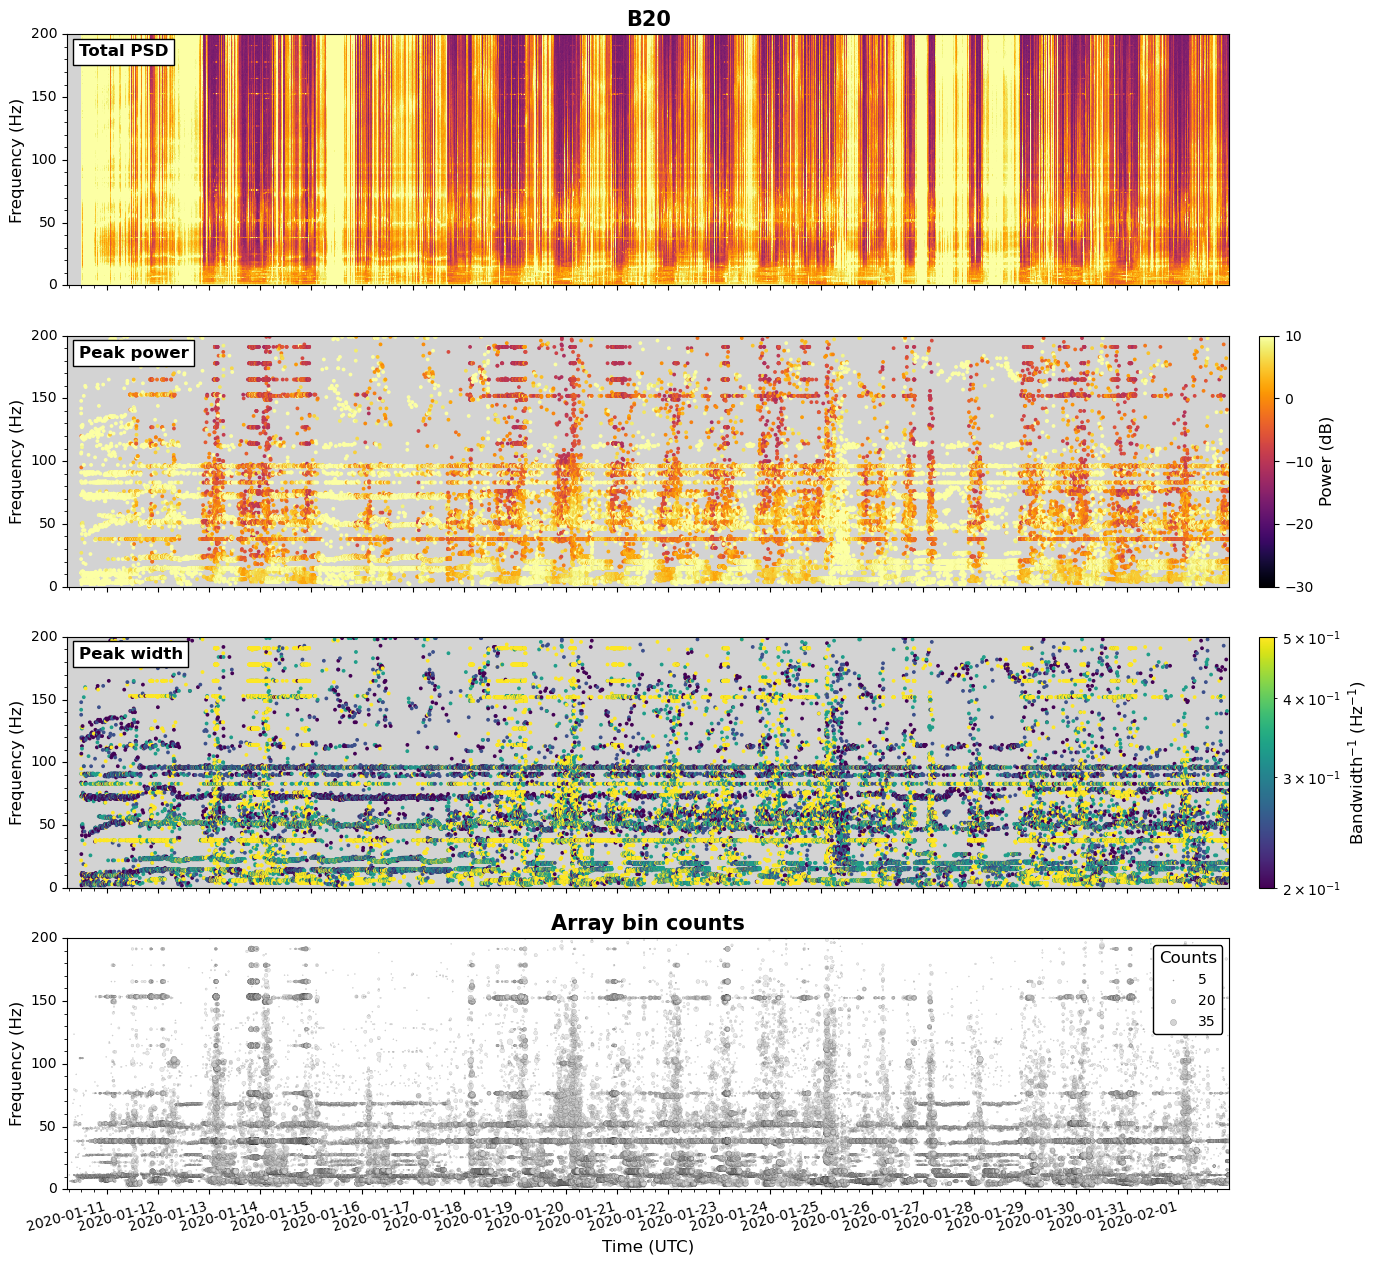

In [7]:
# Plot the results
fig, axes, power_cbar, rbw_cbar = plot_geo_total_psd_peaks_and_array_counts(trace_total, peak_df_to_plot, count_df,
                                                                            freq_lim=(min_freq, max_freq),
                                                                            marker_size = marker_size, size_scale = size_scale,
                                                                            dbmin = dbmin, dbmax = dbmax, rbwmin = rbwmin, rbwmax = rbwmax,
                                                                            major_time_spacing = major_time_spacing, minor_time_spacing = minor_time_spacing,
                                                                            major_freq_spacing = major_freq_spacing, minor_freq_spacing = minor_freq_spacing)

In [8]:
filename_fig = filename_peak.replace("spectral_peaks", f"total_psd_and_array_bin_counts_{station_to_plot}")
filename_fig = filename_fig.replace(".csv", f"_{min_freq:.0f}to{max_freq:.0f}hz.png")
save_figure(fig, filename_fig)

Figure saved to /fp/projects01/ec332/data/figures/geo_total_psd_and_array_bin_counts_B20_window60s_overlap0.0_downsample60_prom5db_rbw0.2_0to200hz.png
